<a href="https://colab.research.google.com/github/Madhav2008/Project133/blob/main/Final_Project_132_And_133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving final_data.csv to final_data.csv


In [ ]:
import pandas as pd
import csv

In [ ]:
df = pd.read_csv('final_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius
0,0,Sun,0.000015813,1.0,1
1,1,Sirius,8.6,2.1,1.71
2,2,Canopus,310,15.0,71
3,3,Alpha Centauri,4.4,1.1,1.2
4,4,Arcturus,37,1.1,26


In [ ]:
df.columns

Index(['Unnamed: 0', 'Star_name', 'Distance', 'Mass', 'Radius'], dtype='object')

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,Star_name,Distance,Mass,Radius
0,Sun,0.000015813,1.0,1
1,Sirius,8.6,2.1,1.71
2,Canopus,310,15.0,71
3,Alpha Centauri,4.4,1.1,1.2
4,Arcturus,37,1.1,26


In [ ]:
df.dtypes

Star_name     object
Distance      object
Mass         float64
Radius        object
dtype: object

In [ ]:
df['Radius']=df['Radius'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [ ]:
radius = df['Radius'].to_list()
mass = df['Mass'].to_list()
gravity =[]

def convert_to_si(radius,mass):
    for i in range(0,len(radius)-1):
        radius[i] = radius[i]*6.957e+8
        mass[i] = mass[i]*1.989e+30
        
convert_to_si(radius,mass)


In [ ]:
def gravity_calculation(radius,mass):
    G = 6.674e-11
    for index in range(0,len(mass)):
        g= (mass[index]*G)/((radius[index])**2)
        gravity.append(g)
        
gravity_calculation(radius,mass)

df["Gravity"] = gravity
df

,Star_name,Distance,Mass,Radius,Gravity
0,Sun,0.000015813,1.000000,1.000000,2.742692e+02
1,Sirius,8.6,2.100000,1.710000,1.969718e+02
2,Canopus,310,15.000000,71.000000,8.161153e-01
3,Alpha Centauri,4.4,1.100000,1.200000,2.095112e+02
4,Arcturus,37,1.100000,26.000000,4.462960e-01
...,...,...,...,...,...
248,2MASSI J2356547-155310,74,0.076367,0.112012,1.669385e+03
249,WISE 0410+1502,20,0.005728,0.120233,1.086673e+02
250,WISE 0458+6434A,35.9,0.014319,0.431605,2.108201e+01
251,WISE 0458+6434B,35.9,0.009546,0.390499,1.716928e+01


In [ ]:
df.to_csv("star_with_gravity.csv")

In [ ]:
df.dtypes

Star_name     object
Distance      object
Mass         float64
Radius       float64
Gravity      float64
dtype: object

In [ ]:
df = pd.read_csv("star_with_gravity.csv")

In [ ]:
df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000015813,1.0,1.00,274.269161
1,1,Sirius,8.6,2.1,1.71,196.971800
2,2,Canopus,310,15.0,71.00,0.816115
3,3,Alpha Centauri,4.4,1.1,1.20,209.511165
4,4,Arcturus,37,1.1,26.00,0.446296


In [ ]:
mass = df["Mass"].to_list()
radius = df["Radius"].to_list()
gravity = df["Gravity"].to_list()

In [ ]:
mass.sort()
radius.sort()
gravity.sort()

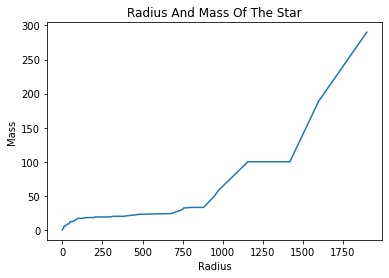

In [ ]:
import matplotlib.pyplot as plt

plt.plot(radius, mass)
plt.title("Radius And Mass Of The Star")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

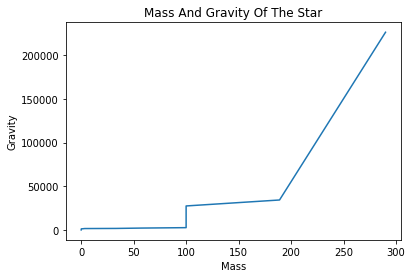

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mass, gravity)
plt.title("Mass And Gravity Of The Star")
plt.xlabel("Mass")
plt.ylabel("Gravity")
plt.show()

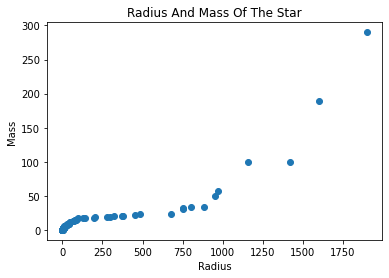

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(radius, mass)
plt.title("Radius And Mass Of The Star")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

In [ ]:
df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000015813,1.0,1.00,274.269161
1,1,Sirius,8.6,2.1,1.71,196.971800
2,2,Canopus,310,15.0,71.00,0.816115
3,3,Alpha Centauri,4.4,1.1,1.20,209.511165
4,4,Arcturus,37,1.1,26.00,0.446296


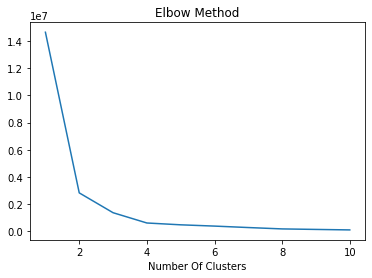

In [ ]:
from sklearn.cluster import KMeans

X = df.iloc[:, [3, 4]].values
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.show()